**NOTE:** This notebook was *AI-generated* using dandi-notebook-gen. Neither the code nor the outputs have been fully verified. Please exercise caution when interpreting the results; you may wish to validate the code before relying on insights.

# Exploring DANDI Dataset 001363: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound

**Citation:** Ramachandran, Sandhya; Gao, Huan; Yu, Kai; Yeh, Kelly; He, Bin (2025) Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001363/draft

## Dataset Description
This dataset investigates neuronal response to transcranial focused ultrasound stimulation on rat somatosensory cortex. A flexible ultraflexible nanoelectric thread (NET) electrode enables exploration of higher ultrasound intensities, avoiding artifacts encountered with rigid electrodes.

Experiments varied:
- Ultrasound pressure (100, 400, 700, 1000, 1300 kPa)
- Duty cycle (0.6%, 6%, 30%, 60%, 90%)
- Pulse repetition frequency (30 Hz up to 4500 Hz)

Each recording has 505 trials. Recordings include multi-electrode extracellular electrophysiology data.

## Contents
- Retrieve dandiset info using DANDI API
- Listing assets in the Dandiset
- Loading NWB file remotely
- Exploring electrophysiology data
- Example visualizations (raw traces, heatmaps, trial timing)

**Note:** This notebook assumes you have installed packages:\n
`pynwb`, `remfile`, `h5py`, `matplotlib`, `seaborn`, `dandi`.\n
If not, please install them before running.

In [1]:
# Import libraries
import pynwb
import remfile
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

sns.set_theme()

## Accessing Dandiset 001363 and listing assets programmatically

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())
print(f"Total number of assets in Dandiset: {len(assets)}")
for asset in assets[:5]:
    print(f"- Path: {asset.path}, size: {asset.size} bytes")

Total number of assets in Dandiset: 55
- Path: sub-BH643/sub-BH643_ecephys.nwb, size: 3186023744 bytes
- Path: sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb, size: 2995706696 bytes
- Path: sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb, size: 3154042176 bytes
- Path: sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb, size: 3186023744 bytes
- Path: sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb, size: 3185237288 bytes


## Loading an example NWB file remotely
We'll load a single file as example:  
`sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb`  
*Note:* The data shape is large (31M timepoints × 32 channels), so we will only stream small chunks.

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"

file = remfile.File(nwb_url)
h5f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=h5f)
nwbfile = io.read()
print("Loaded NWB file.")

Loaded NWB file.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring metadata

In [4]:
print("Session:", nwbfile.session_description)
print("Subject ID:", nwbfile.subject.subject_id)
print("Species:", nwbfile.subject.species)
print("Sex:", nwbfile.subject.sex)
print("Institution:", nwbfile.institution)
print("Device(s):")
for device in nwbfile.devices.values():
    print(f" - {device.name}: {device.description} (Manufactured by: {device.manufacturer})")

Session: Rat Ultrasound Array Stimulation
Subject ID: BH589
Species: Rattus norvegicus
Sex: M
Institution: Carnegie Mellon University
Device(s):
 - array: NET probe flexible electrode (Manufactured by: Xie Lab Rice University)


### Electrode information

In [5]:
electrodes = nwbfile.electrodes
print("Electrode columns:", electrodes.colnames)
print("Number of electrodes:", len(electrodes))
print(electrodes.to_dataframe().head())

Electrode columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')
Number of electrodes: 32
        x      y    z  imp location filtering  \
id                                              
0   24.73    0.0  0.0  NaN  unknown   unknown   
1    0.00   25.0  0.0  NaN  unknown   unknown   
2   24.73   50.0  0.0  NaN  unknown   unknown   
3    0.00   75.0  0.0  NaN  unknown   unknown   
4   24.73  100.0  0.0  NaN  unknown   unknown   

                                                group   group_name  
id                                                                  
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x12340...  shank1elec1  
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x12340...  shank1elec2  
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x12340...  shank1elec3  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x12340...  shank1elec4  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x12340...  shank1elec5  


### Trial intervals

In [6]:
trials = nwbfile.trials
print("Number of trials:", len(trials))
print("Trial columns:", trials.colnames)
try:
    print(trials.to_dataframe().head())
except:
    print("Could not convert trials to DataFrame.")

Number of trials: 500
Trial columns: ('start_time', 'stop_time')
    start_time  stop_time
id                       
1     0.341402   1.841402
2     2.816532   4.316532
3     5.115003   6.615003
4     7.458079   8.958079
5     9.984000  11.484000


## Exploring extracellular recording data

In [7]:
ephys = nwbfile.acquisition['ElectricalSeries']
print("ElectricalSeries info:")
print(f"Sampling rate: {ephys.rate} Hz")
print(f"Shape: {ephys.data.shape}")
print(f"Unit: {ephys.unit}")
print(f"Description: {ephys.description}")

ElectricalSeries info:
Sampling rate: 24414.0625 Hz
Shape: (31084544, 32)
Unit: volts
Description: no description


### Plot snippet of extracellular traces from a few channels and short time window

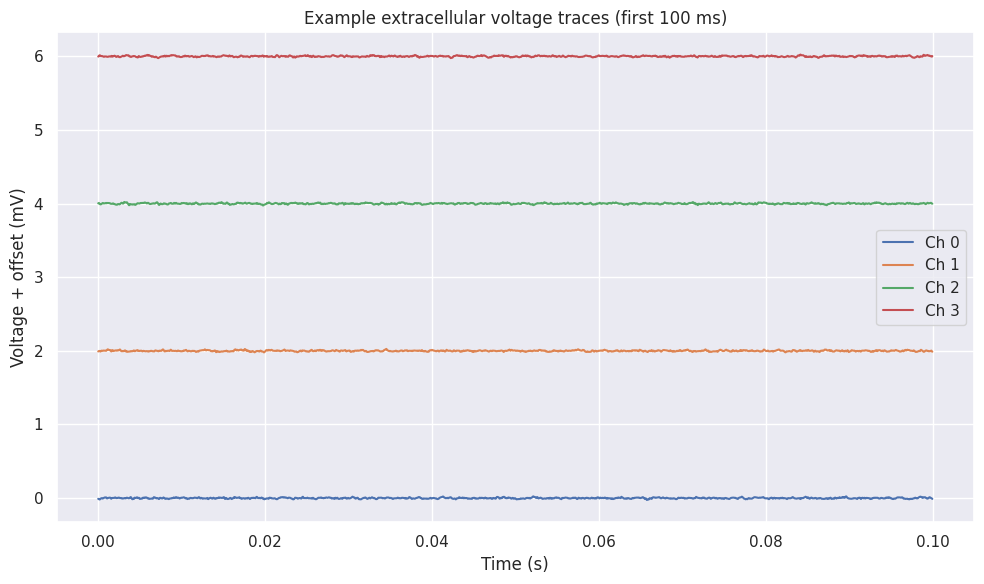

In [8]:
# Visualization for the first 100 ms on 4 example channels
num_channels = ephys.data.shape[1]
snippet_duration_sec = 0.1  # 100 ms
fs = ephys.rate
start_sample = 0
end_sample = int(snippet_duration_sec * fs)
data_snippet = ephys.data[start_sample:end_sample, :4]  # first 4 channels

time_vector = np.arange(start_sample, end_sample) / fs

plt.figure(figsize=(10, 6))
for ch in range(4):
    plt.plot(time_vector, data_snippet[:, ch] * 1e3 + ch*2, label=f'Ch {ch}')  # Convert volts to mV offset for display
plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (mV)')
plt.title('Example extracellular voltage traces (first 100 ms)')
plt.legend()
plt.tight_layout()
plt.show()

### Heatmap of activity over short window and subset of channels

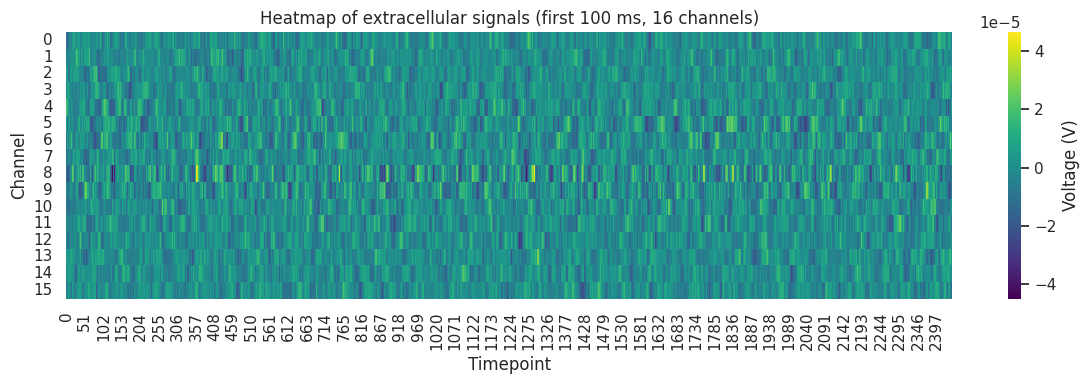

In [9]:
snippet = ephys.data[start_sample:end_sample, :16]  # first 16 channels

plt.figure(figsize=(12, 4))
sns.heatmap(snippet.T, cmap='viridis', cbar_kws={'label': 'Voltage (V)'})
plt.xlabel('Timepoint')
plt.ylabel('Channel')
plt.title('Heatmap of extracellular signals (first 100 ms, 16 channels)')
plt.tight_layout()
plt.show()

### Histogram of voltage distribution (small subset)

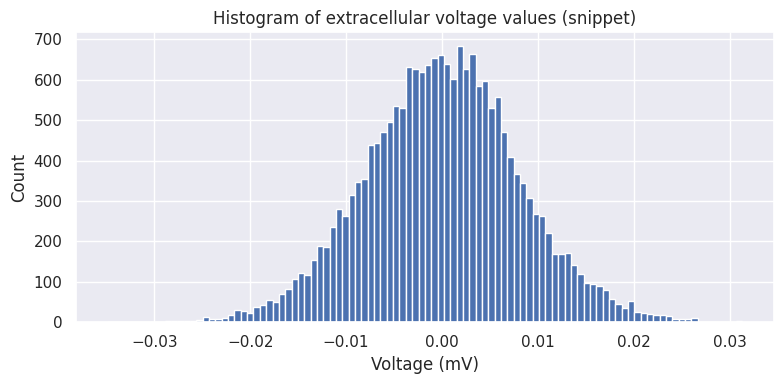

In [10]:
snippet_hist = ephys.data[start_sample:end_sample, :8]  # 8 channels
plt.figure(figsize=(8, 4))
plt.hist(snippet_hist.flatten()*1e3, bins=100)
plt.xlabel('Voltage (mV)')
plt.ylabel('Count')
plt.title('Histogram of extracellular voltage values (snippet)')
plt.tight_layout()
plt.show()

## Trial structure visualization

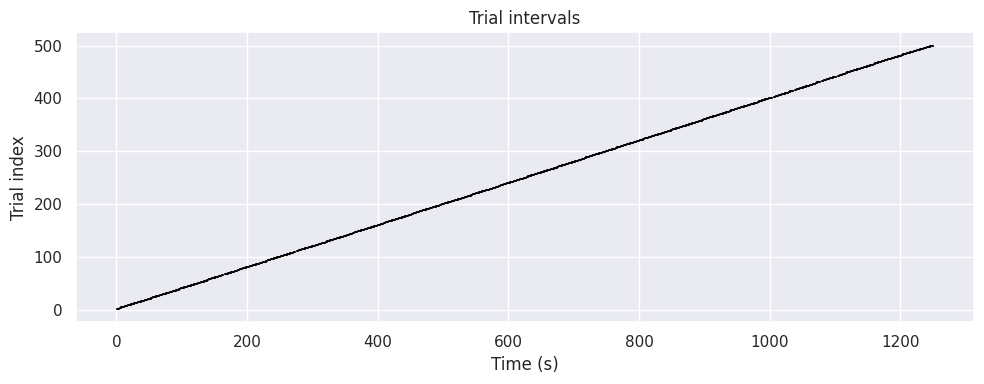

In [11]:
trial_df = None
try:
    trial_df = trials.to_dataframe()
except:
    print("Could not convert trials to DataFrame.")
if trial_df is not None:
    plt.figure(figsize=(10, 4))
    for idx, row in trial_df.iterrows():
        plt.plot([row['start_time'], row['stop_time']], [idx, idx], color='black')
    plt.xlabel('Time (s)')
    plt.ylabel('Trial index')
    plt.title('Trial intervals')
    plt.tight_layout()
    plt.show()

## Summary
This notebook demonstrated how to:
- Connect to DANDI and browse assets
- Remote-stream a NWB file
- Explore metadata: subject, devices, electrodes, trials
- Visualize a small snippet of extracellular electrophysiology data

For further analysis, please tailor the provided code to your scientific questions and validate all steps.